# Система распознования лиц

GitHub Repo - https://github.com/IgorVolochay/Face-recognition

## Requirements

* python == 3.8.5
* dlib == 19.23.1
* tensorflow == 2.2.0
* skimage == 0.19.2
* pillow == 9.0.1
* matplotlib == 3.5.2

In [1]:
import random

import dlib

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from skimage import io
from PIL import Image, ImageFilter, ImageOps
from matplotlib import image, pyplot

### Установка предобученных моделей распознования лиц:

1. https://github.com/tzutalin/dlib-android/blob/master/data/shape_predictor_68_face_landmarks.dat
2. https://github.com/ageitgey/face_recognition_models/blob/master/face_recognition_models/models/dlib_face_recognition_resnet_model_v1.dat

In [2]:
sp = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
facerec = dlib.face_recognition_model_v1('dlib_face_recognition_resnet_model_v1.dat')
detector = dlib.get_frontal_face_detector()

Detection 0: Left: 70 Top: 248 Right: 869 Bottom: 1047


dlib.vector([-0.0902129, -0.0284728, -0.0201088, -0.0237396, 0.0195988, -0.0624656, -0.0341601, -0.0645328, 0.145692, -0.103387, 0.164995, -0.0667768, -0.19563, -0.0463215, 0.0462609, 0.0386064, -0.204915, -0.0965468, -0.0547373, -0.130571, 0.100364, 0.0206162, -0.0427951, 0.108554, -0.284338, -0.223312, -0.115767, -0.17538, 0.0108243, -0.0472676, 0.0455159, 0.0537128, -0.0945584, 0.00360177, 0.0861953, 0.0713386, 0.0278726, -0.0417318, 0.217425, -0.0155115, -0.131425, 0.0396619, 0.0762383, 0.219826, 0.112767, 0.0618684, 0.010629, -0.050927, 0.225475, -0.277578, 0.061519, 0.183117, 0.0907261, 0.0902939, 0.156285, -0.202908, 0.049825, 0.165025, -0.225213, 0.124595, -0.00210925, -0.00164449, 0.0281997, 0.0171772, 0.118259, 0.0737286, -0.16149, -0.0689448, 0.155305, -0.175737, 0.00137892, 0.170224, -0.0961124, -0.265967, -0.20611, 0.0573926, 0.432559, 0.168564, -0.122163, 0.0571624, -0.0393574, -0.0610366, 0.071344, 0.0299074, -0.113738, -0.0179229, -0.0436408, 0.0608074, 0.205917, 0.0866

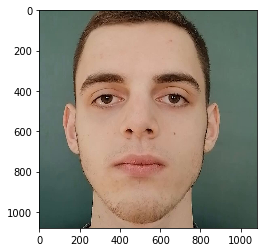

In [3]:
img = io.imread("Men1/Men1_000.jpg")
pyplot.imshow(img, interpolation='nearest')
new_img = detector(img, 1)
for k, d in enumerate(new_img):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
        k, d.left(), d.top(), d.right(), d.bottom()))
    shape = sp(img, d)
    
face_descriptor1 = facerec.compute_face_descriptor(img, shape)
face_descriptor1

### Формирование обучающей и тестовой выборки:

> **ToDo**: переписать блок для большей эффективности и лучшей читабельности

In [4]:
li_train = list()
li_test = list()

for i in range(5):
    if i == 0:
        file = "Men1/Men1_"
        pred = [1, 0, 0, 0]
    elif i == 1:
        file = "Men2/Men2_"
        pred = [0, 1, 0, 0]
    elif i == 2:
        file = "Men3/Men3_"
        pred = [0, 0, 1, 0]
    elif i == 3:
        file = "Female1/Female1_"
        pred = [0, 0, 0, 1]
    else:
        file = "SomePerson/SomePerson_"
        pred = [0, 0, 0, 0]
        
    li = list()    
    counter = 0
    while True:
        try:
            if counter % 10 == 0:
                print(counter, file)
            if len(str(counter)) == 1:
                c = "00" + str(counter)
            elif len(str(counter)) == 2:
                c = "0" + str(counter)
            else:
                c = str(counter)

            raw_img = io.imread(file + str(c) + ".jpg")
            dtc_img = detector(raw_img, 1)
            for k, d in enumerate(dtc_img):
                shape = sp(raw_img, d)

            li.append([facerec.compute_face_descriptor(raw_img, shape), pred])
                                                                                                                                    
            counter += 1
        except:
            for _ in range(len(li) // 10):
                rand_index = random.randint(0, len(li) - 1)
                li_test.append(li[rand_index])
                del li[rand_index]
            li_train += li
            
            print("Done!")
            break

0 Men1/Men1_
10 Men1/Men1_
20 Men1/Men1_
30 Men1/Men1_
40 Men1/Men1_
50 Men1/Men1_
60 Men1/Men1_
70 Men1/Men1_
80 Men1/Men1_
90 Men1/Men1_
100 Men1/Men1_
110 Men1/Men1_
120 Men1/Men1_
130 Men1/Men1_
140 Men1/Men1_
150 Men1/Men1_
160 Men1/Men1_
170 Men1/Men1_
Done!
0 Men2/Men2_
10 Men2/Men2_
20 Men2/Men2_
30 Men2/Men2_
40 Men2/Men2_
50 Men2/Men2_
60 Men2/Men2_
70 Men2/Men2_
80 Men2/Men2_
90 Men2/Men2_
100 Men2/Men2_
110 Men2/Men2_
120 Men2/Men2_
130 Men2/Men2_
140 Men2/Men2_
150 Men2/Men2_
160 Men2/Men2_
170 Men2/Men2_
180 Men2/Men2_
Done!
0 Men3/Men3_
10 Men3/Men3_
20 Men3/Men3_
30 Men3/Men3_
40 Men3/Men3_
50 Men3/Men3_
60 Men3/Men3_
70 Men3/Men3_
80 Men3/Men3_
90 Men3/Men3_
100 Men3/Men3_
110 Men3/Men3_
120 Men3/Men3_
130 Men3/Men3_
140 Men3/Men3_
150 Men3/Men3_
160 Men3/Men3_
170 Men3/Men3_
180 Men3/Men3_
190 Men3/Men3_
200 Men3/Men3_
210 Men3/Men3_
220 Men3/Men3_
230 Men3/Men3_
Done!
0 Female1/Female1_
10 Female1/Female1_
20 Female1/Female1_
30 Female1/Female1_
40 Female1/Female1_
5

In [5]:
print(len(li_train), len(li_test))

809 88


In [6]:
list_with_train_inputs = list()
list_with_train_predictions = list()
list_with_test_inputs = list()
list_with_test_predictions = list()

random.shuffle(li_train)
for i in range(len(li_train)):
    list_with_train_inputs.append(list(li_train[i][0]))
    list_with_train_predictions.append(li_train[i][1])
    
random.shuffle(li_test)
for i in range(len(li_test)):
    list_with_test_inputs.append(list(li_test[i][0]))
    list_with_test_predictions.append(li_test[i][1])
    
print(len(list_with_train_inputs), len(list_with_train_predictions), len(list_with_test_inputs), len(list_with_test_predictions))

809 809 88 88


## Нейронная сеть классификатор

In [16]:
model = Sequential()
model.add(Dense(units=256, input_shape=(len(list_with_train_inputs[0]),)))
model.add(Dropout(0.2))
model.add(Dense(units=256, input_shape=(256,), activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=4, input_shape=(256,)))
model.compile(loss="mean_squared_error", metrics=['accuracy'])

history = model.fit(list_with_train_inputs, list_with_train_predictions, epochs=500)

Epoch 1/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0565 - accuracy: 0.8529
Epoch 2/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0130 - accuracy: 0.9197
Epoch 3/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0098 - accuracy: 0.9184
Epoch 4/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0087 - accuracy: 0.9110
Epoch 5/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0072 - accuracy: 0.9122
Epoch 6/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0074 - accuracy: 0.9085
Epoch 7/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 0.9098
Epoch 8/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0069 - accuracy: 0.9135
Epoch 9/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 0.9234
Epoch 10/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0064 - accuracy: 0.9147
Epoch 11/

26/26 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 0.9122
Epoch 84/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 0.9122
Epoch 85/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 0.9184
Epoch 86/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 0.9135
Epoch 87/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 0.9110
Epoch 88/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 0.9135
Epoch 89/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 0.9135
Epoch 90/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 0.9122
Epoch 91/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 0.9061
Epoch 92/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 0.9073
Epoch 93/500


26/26 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 0.9110
Epoch 165/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 0.9135
Epoch 166/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 0.9073
Epoch 167/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 0.9073: 0s - loss: 0.0027 - accuracy: 0.90
Epoch 168/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 0.9073
Epoch 169/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 0.9172
Epoch 170/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 0.9085
Epoch 171/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 0.9172
Epoch 172/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 0.9110
Epoch 173/500
26/26 [==============================] - 0s 2ms/step - 

26/26 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 0.9122
Epoch 245/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 0.9122
Epoch 246/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 0.9172
Epoch 247/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.9147
Epoch 248/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.9234
Epoch 249/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.9098
Epoch 250/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 0.9159
Epoch 251/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 0.9147
Epoch 252/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 0.9110
Epoch 253/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 0.9147
Epoc

26/26 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.9246
Epoch 326/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 0.9122
Epoch 327/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 0.9221
Epoch 328/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 0.9197
Epoch 329/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 0.9197
Epoch 330/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 0.9172
Epoch 331/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 0.9159
Epoch 332/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.9048
Epoch 333/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 0.9147
Epoch 334/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 0.9234
Epoc

26/26 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 0.9147
Epoch 407/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 0.9110
Epoch 408/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 0.9147
Epoch 409/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 0.9197
Epoch 410/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 0.9110
Epoch 411/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 0.9110
Epoch 412/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 0.9184
Epoch 413/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 0.9147
Epoch 414/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 0.9184
Epoch 415/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 0.9234
Epoc

26/26 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 0.9147
Epoch 488/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 0.9110
Epoch 489/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 0.9110
Epoch 490/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 0.9234
Epoch 491/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 0.9159
Epoch 492/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.9098
Epoch 493/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 0.9135
Epoch 494/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 0.9184
Epoch 495/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 0.9159
Epoch 496/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 0.9159
Epoc

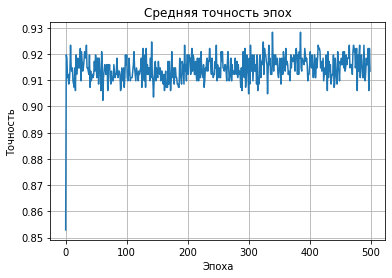

In [17]:
pyplot.plot(history.history['accuracy'])

pyplot.title('Средняя точность эпох')
pyplot.ylabel('Точность')
pyplot.xlabel('Эпоха')
pyplot.grid()

## Тестирование точности предсказаний нейронной сетиисходя из тестовой выборки

In [18]:
model.evaluate(list_with_train_inputs, list_with_train_predictions)

26/26 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 0.9642


[0.0013105241814628243, 0.9641532897949219]